# Plot Results after Training on CALCE Dataset

This notebook contains code for plotting the RE, RMSE and MAE for different noise levels.

## Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

## Load Dataset

In [ ]:
ddf = pd.read_csv('results_CALCE.csv')
display(ddf)

,Noise,Noise Level,RE,RMSE,MAE
0,Gaussian,0.500,0.6600,0.1806,0.0326
1,Gaussian,0.050,0.2000,0.1000,0.0326
2,Gaussian,0.010,0.0820,0.0900,0.0082
3,Gaussian,0.001,0.0523,0.0927,0.0082
4,Speckle,0.500,0.5600,0.1523,0.0234
5,Speckle,0.050,0.1200,0.1030,0.0112
6,Speckle,0.010,0.0808,0.0912,0.0084
7,Speckle,0.001,0.0523,0.0928,0.0087
8,Poisson,0.500,0.3500,0.1651,0.0273
9,Poisson,0.050,0.1062,0.0727,0.0273


## Plot Metrics for Each Noise Type

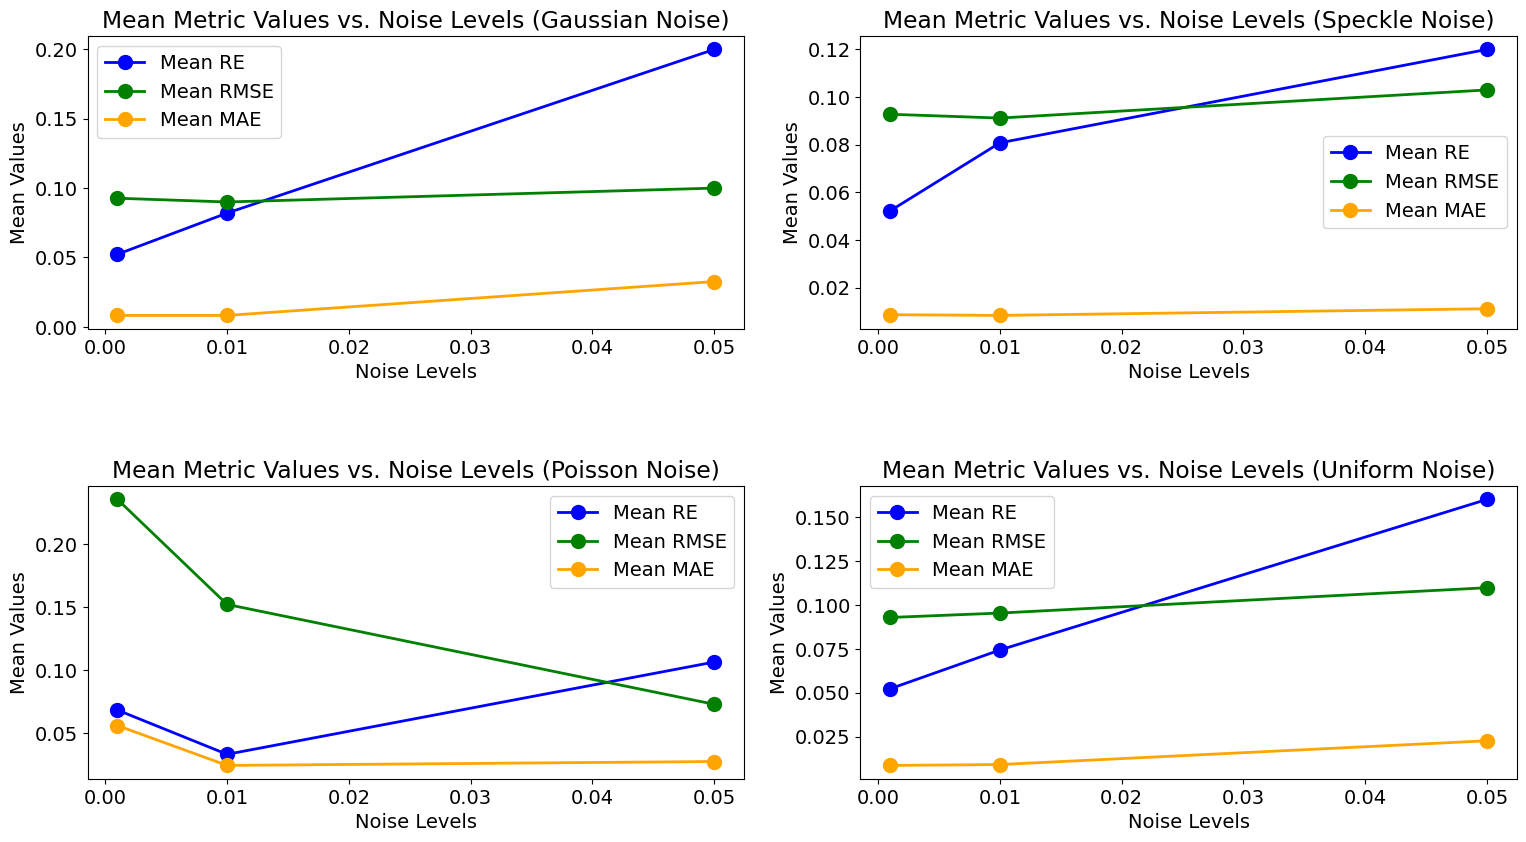

In [5]:
matplotlib.rcParams.update({'font.size': 14})
noises = ['Gaussian', 'Speckle', 'Poisson', 'Uniform']

plt.figure(figsize=(16, 9))
for i in range(1, 5):
    filter = ddf.loc[ddf['Noise'] == noises[i-1]]
    filter = filter.loc[filter['Noise Level'].isin([0.001, 0.01, 0.05])]
    plt.subplot(2, 2, i)
    plt.tight_layout(pad=2.0, h_pad=4)
    plt.title('Mean Metric Values vs. Noise Levels ({} Noise)'.format(str(noises[i-1])))
    plt.plot(filter['Noise Level'], filter['RE'], 'b-o', label='Mean RE', linewidth=2,markersize=10)
    plt.plot(filter['Noise Level'], filter['RMSE'], 'g-o', label='Mean RMSE', linewidth=2,markersize=10)
    plt.plot(filter['Noise Level'], filter['MAE'], '-o', color='orange', label='Mean MAE', linewidth=2,markersize=10)
    plt.xlabel('Noise Levels')
    plt.ylabel('Mean Values')
    plt.legend()
plt.savefig('Calce_Noises.eps', bbox_inches='tight', pad_inches=0)
plt.show()

## Plot Noise Values for each metric

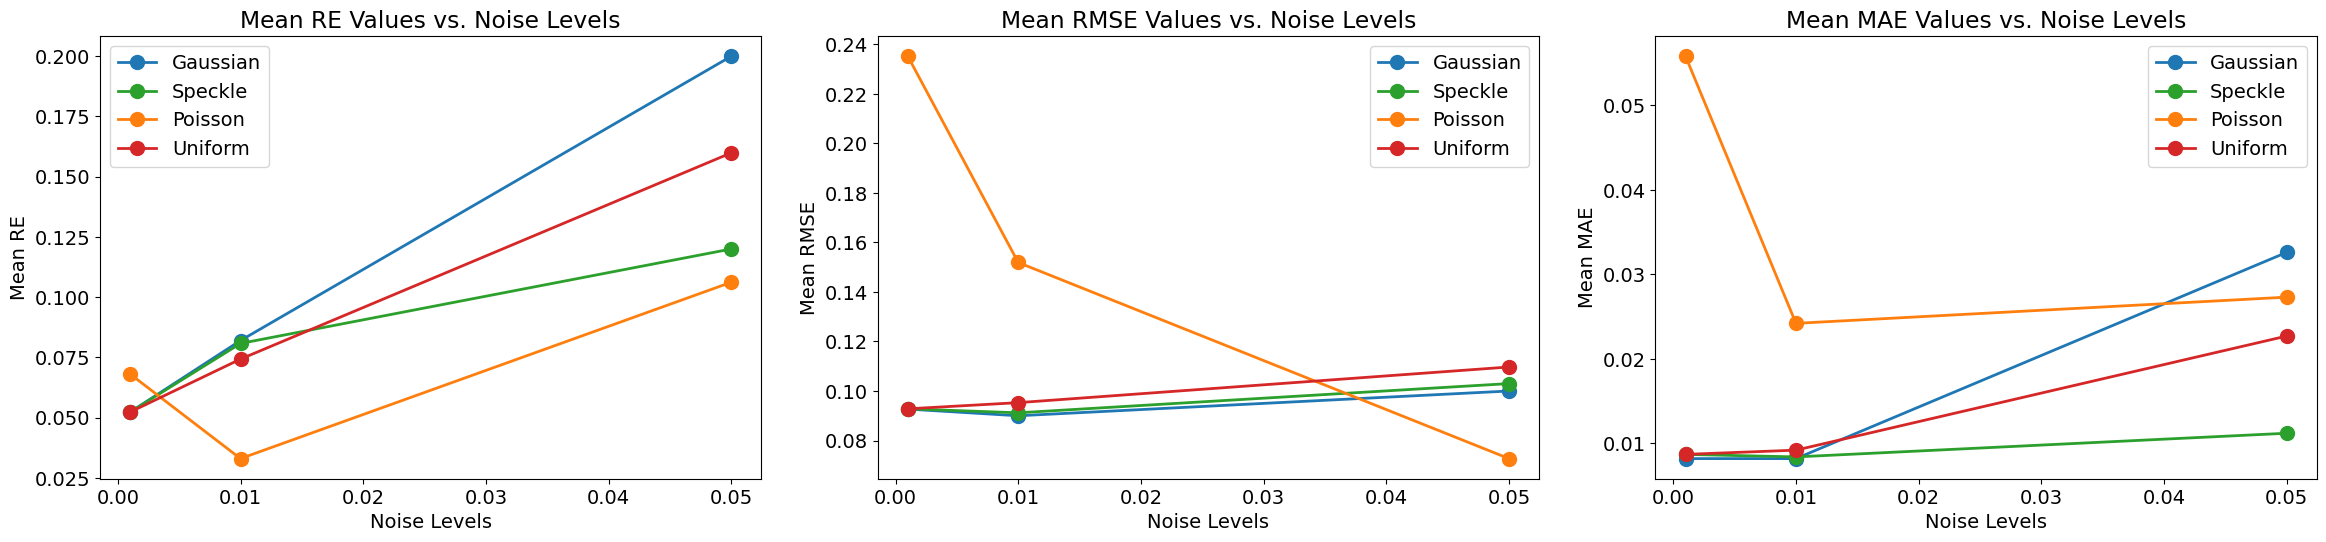

In [6]:
metrics = ['RE', 'RMSE', 'MAE']

plt.figure(figsize=(24, 6))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    plt.tight_layout(pad=2.0, h_pad=4)
    plt.title('Mean {} Values vs. Noise Levels'.format(str(metrics[i-1])))

    filter = ddf.loc[ddf['Noise Level'] != 0.5]

    gauss = filter.loc[filter['Noise'] == 'Gaussian']
    plt.plot(gauss['Noise Level'], gauss[metrics[i-1]], 'C0-o', label='Gaussian', linewidth=2,markersize=10)

    speckle = filter.loc[filter['Noise'] == 'Speckle']
    plt.plot(speckle['Noise Level'], speckle[metrics[i-1]], 'C2-o', label='Speckle', linewidth=2,markersize=10)

    poisson = filter.loc[filter['Noise'] == 'Poisson']
    plt.plot(poisson['Noise Level'], poisson[metrics[i-1]], 'C1-o', label='Poisson', linewidth=2,markersize=10)

    uniform = filter.loc[filter['Noise'] == 'Uniform']
    plt.plot(uniform['Noise Level'], uniform[metrics[i-1]], 'C3-o', label='Uniform', linewidth=2,markersize=10)

    plt.xlabel('Noise Levels')
    plt.ylabel('Mean {}'.format(str(metrics[i-1])))
    plt.legend()
plt.savefig('CALCE_Noises2.eps', bbox_inches='tight', pad_inches=0)
plt.show()